# Day2

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
cancer = load_breast_cancer()
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.916083916083916


In [4]:
list(zip(cancer.feature_names, clf.feature_importances_.round(4)))[:10]

[('mean radius', 0.0),
 ('mean texture', 0.0417),
 ('mean perimeter', 0.0),
 ('mean area', 0.0),
 ('mean smoothness', 0.0),
 ('mean compactness', 0.0),
 ('mean concavity', 0.0),
 ('mean concave points', 0.0426),
 ('mean symmetry', 0.0114),
 ('mean fractal dimension', 0.0)]

In [7]:
df = pd.DataFrame({'feature':cancer.feature_names,'importance':clf.feature_importances_})
df = df.sort_values('importance', ascending=False)
print(df.head(10))

                 feature  importance
22       worst perimeter    0.694689
27  worst concave points    0.121068
7    mean concave points    0.042647
1           mean texture    0.041720
21         worst texture    0.039639
13            area error    0.017216
20          worst radius    0.017188
15     compactness error    0.012042
8          mean symmetry    0.011405
14      smoothness error    0.002385


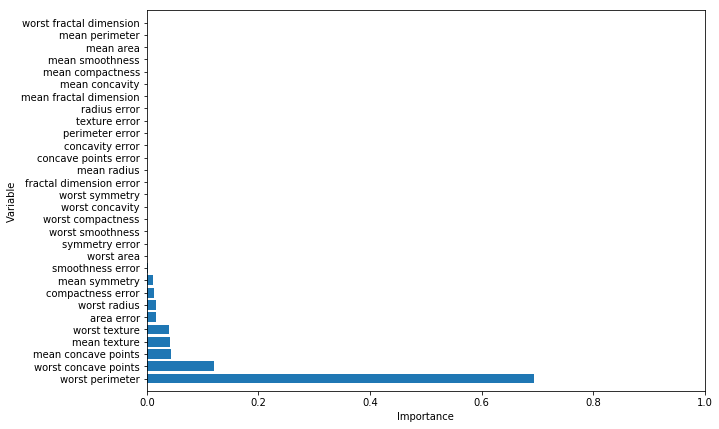

In [16]:
x = df.feature
y = df.importance
ypos = np.arange(len(x))

plt.figure(figsize=(10,7))
plt.barh(x,y)
plt.yticks(ypos, x)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.xlim(0,1)
plt.ylim(-1,len(x))
plt.show()

# ML, DL을 하기위해 꼭 필수적인 공부

- 확률

- 선형대수

In [17]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
IDtest = test["PassengerId"]

In [18]:
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1
print(train.shape)
train[["Sex", "Sex_encode"]].head()

(891, 13)


,Sex,Sex_encode
0,male,0.0
1,female,1.0
2,female,1.0
3,female,1.0
4,male,0.0


In [21]:
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1
print(test.shape)
test[["Sex", "Sex_encode"]].head()

(418, 12)


,Sex,Sex_encode
0,male,0.0
1,female,1.0
2,male,0.0
3,male,0.0
4,female,1.0


In [22]:
test[pd.isnull(test["Fare"])]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


In [24]:
mean_fare = train["Fare"].mean()
print("평균요금 = ${0:.3f}".format(mean_fare))

평균요금 = $32.204


In [25]:
test.loc[pd.isnull(test["Fare"]), "Fare"] = mean_fare
test[pd.isnull(test["Fare"])]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode


In [26]:
train_embarked = pd.get_dummies(train["Embarked"], prefix="Embarked")
train_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [27]:
test_embarked = pd.get_dummies(test["Embarked"], prefix="Embarked")
test_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [28]:
train = pd.concat([train, train_embarked], axis=1)
test = pd.concat([test, test_embarked], axis=1)
test[["Embarked", "Embarked_C", "Embarked_Q", "Embarked_S"]].head()

,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,Q,0,1,0
1,S,0,0,1
2,Q,0,1,0
3,S,0,0,1
4,S,0,0,1


In [30]:
feature_names = ["Pclass", "Sex_encode", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S"]

X_train = train[feature_names]
y_train = train["Survived"]
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2, random_state=7)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best')

In [31]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model, feature_names=feature_names, class_names=["Perish", "Survived"], out_file="decision-tree.dot")

with open("decision-tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [38]:
x_test = test[feature_names]
print(x_test.shape)
x_test.head()

(418, 6)


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0.0,7.8292,0,1,0
1,3,1.0,7.0000,0,0,1
2,2,0.0,9.6875,0,1,0
3,3,0.0,8.6625,0,0,1
4,3,1.0,12.2875,0,0,1


In [39]:
prediction = model.predict(x_test)

x_test["survived"] = prediction
x_test[:20]

/Users/heojeong-wook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_Q,Embarked_S,survived
0,3,0.0,7.8292,0,1,0,0
1,3,1.0,7.0000,0,0,1,0
2,2,0.0,9.6875,0,1,0,0
3,3,0.0,8.6625,0,0,1,0
4,3,1.0,12.2875,0,0,1,0
5,3,0.0,9.2250,0,0,1,0
6,3,1.0,7.6292,0,1,0,0
7,2,0.0,29.0000,0,0,1,0
8,3,1.0,7.2292,1,0,0,0
9,3,0.0,24.1500,0,0,1,0


In [40]:
titanic_gender_submission.csv
import numpy as np
submission = pd.read_csv("titanic_gender_submission.csv", index_col = "PassengerId")

submission["Survived"] = prediction.astype(np.int32)

print(submission.shape)
submission.head()

NameError: name 'titanic_gender_submission' is not defined

In [41]:
submission = pd.read_csv('gender_submission.csv')

In [42]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [45]:
submission.to_csv("baseline-script.csv")

In [ ]:
submission

In [46]:
submission.to_csv('my_first_submission.csv', index=False)

# 4.3 유방암 예측

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [51]:
cancer = load_breast_cancer()
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target)


In [52]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test))

0.951048951048951


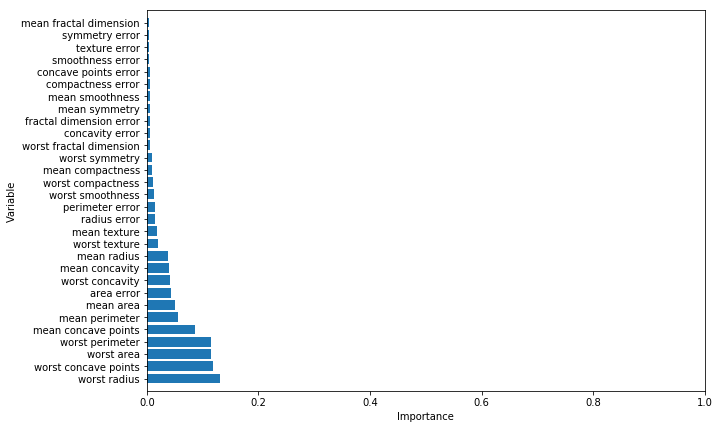

In [53]:
df = pd.DataFrame({'feature':cancer.feature_names, 'importance':rfc.feature_importances_})
df=df.sort_values('importance', ascending=False)
x = df.feature
y = df.importance
ypos = np.arange(len(x))
plt.figure(figsize=(10,7))
plt.barh(x,y)
plt.yticks(ypos,x)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.xlim(0,1)
plt.ylim(-1, len(x))
plt.show()